In [105]:
#Importing csv in a data frame and removing garbage last row AND adding current year to a variable
from datetime import date
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

year_ = int(date.today().year)
df = pd.read_csv(r"C:\Users\Ryan\Documents\Fontys\Semester4\ADSA\orders.csv", delimiter = '|', low_memory=False, encoding = 'ISO-8859-1', header=None)
df.columns = ['Customer_number', 'Age', 'Gender', 'PoR', 'Order_number', 'Order_date', 'Product_number', 'Sub_category', 'Category', 'Count', 'Price', 'Expected_delivery_time', 'Actual_delivery_time', 'Reason_of_return', 'Rating', 'Trash']
del df['Trash']





0          1606586.0
1           554370.0
2          1146785.0
3          1146785.0
4           554370.0
5          1146785.0
6          1217440.0
7           980476.0
8           864167.0
9          1714201.0
10          652200.0
11          106527.0
12         1217440.0
13          482631.0
14         1658763.0
15         1287008.0
16          275014.0
17         1146785.0
18         1287008.0
19          119574.0
20         1146785.0
21         1518539.0
22          294578.0
23          980476.0
24          106527.0
25          402192.0
26          738073.0
27         1658763.0
28          864167.0
29          836990.0
             ...    
2604952     643498.0
2604953     732632.0
2604954    1404398.0
2604955    1682675.0
2604956    1178305.0
2604957    1440272.0
2604958     652197.0
2604959     996774.0
2604960    1457662.0
2604961     375013.0
2604962    1133739.0
2604963     994603.0
2604964    1202220.0
2604965    1287006.0
2604966     635891.0
2604967    1682675.0
2604968    17

In [106]:
#Placed DoB in years
df.Age = df.Age.str.slice(0,4)
df.Age = pd.to_numeric(df.Age)


In [107]:
#Made DoB into the age the person is
df.Age = year_ - df.Age

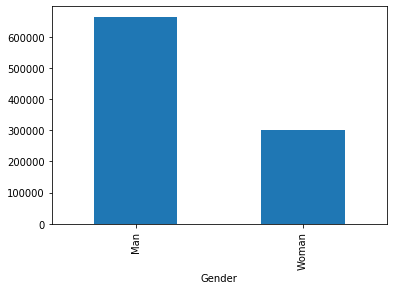

In [108]:
#Amount of orders by gender and removes weird gender

indexName = df[(df['Gender'] != "Man") & (df['Gender'] != "Woman")].index

df.drop(indexName, inplace = True)

df.groupby('Gender')['Order_number'].nunique().plot(kind='bar')
plt.show()

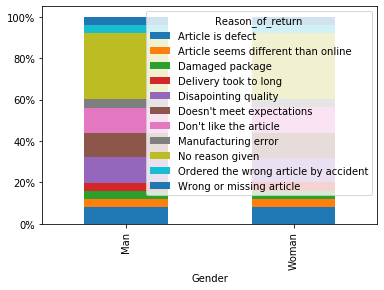

In [119]:
#Show returns by gender in %

df.groupby(['Gender','Reason_of_return']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [118]:
df.head(100)

Customer_number   Age Gender                  PoR  Order_number Order_date  \
0    orders_v3.csv  35.0    Man            Loppersum     1606586.0 2016-07-12   
1          1049989  50.0    Man   Goeree-Overflakkee      554370.0 2016-01-15   
2          1068587  49.0    Man            Terneuzen     1146785.0 2014-05-16   
3          1026863  47.0    Man       Sittard-Geleen     1146785.0 2014-05-14   
4          1049989  50.0    Man   Goeree-Overflakkee      554370.0 2016-01-15   
5          1026863  47.0    Man       Sittard-Geleen     1146785.0 2014-05-14   
6          1065369  45.0  Woman        's-Gravenhage     1217440.0 2014-10-15   
7          1007925  44.0    Man        Borger-Odoorn      980476.0 2013-06-18   
8          1045115  45.0    Man                Sluis      864167.0 2017-10-20   
9          1062991  30.0    Man           Vlagtwedde     1714201.0 2017-06-29   
10         1049709  31.0    Man           Dinkelland      652200.0 2016-12-08   
11         1013333  45.0    Man           Oosterhout      106527.0 2013-06-08   
12         1065369  45.0  Woman        's-Gravenhage     1217440.0 2014-10-15   
13         1055025  47.0    Man             Delfzijl      482631.0 2015-08-20   
14         1018803  29.0  Woman               Boxtel     1658763.0 2017-11-03   
15         1062657  40.0    Man  Bodegraven-Reeuwijk     1287008.0 2015-02-22   
16         1007161  30.0    Man               Tholen      275014.0 2014-08-07   
17         1026863  47.0    Man       Sittard-Geleen     1146785.0 2014-05-14   
18         1062657  40.0    Man  Bodegraven-Reeuwijk     1287008.0 2015-02-22   
19         1035223  36.0    Man           Nederweert      119574.0 2013-08-30   
20         1026863  47.0    Man       Sittard-Geleen     1146785.0 2014-05-14   
21         1014317  48.0    Man          Winterswijk     1518539.0 2016-06-24   
22         1055055  42.0    Man      Steenwijkerland      294578.0 2014-08-21   
23         1007925  44.0    Man        Borger-Odoorn      980476.0 2013-06-18   
24         1013333  45.0    Man           Oosterhout      106527.0 2013-06-08   
25         1007151  41.0    Man       Rijssen-Holten      402192.0 2015-03-29   
26         1030641  58.0    Man             Deventer      738073.0 2017-01-29   
27         1018803  29.0  Woman               Boxtel     1658763.0 2017-11-03   
28         1045115  45.0    Man                Sluis      864167.0 2017-10-20   
29         1028331  53.0  Woman                Vught      836990.0 2017-08-25   
..             ...   ...    ...                  ...           ...        ...   
70         1011383  36.0    Man                Emmen      195660.0 2014-02-02   
71         1072025  35.0    Man          Bergen (L.)     1317444.0 2015-04-29   
72         1012315  52.0    Man   Wijk bij Duurstede      477203.0 2015-10-08   
73         1074317  49.0  Woman          Steenbergen      467410.0 2015-07-25   
74         1073017  37.0    Man             Zuidplas      525031.0 2015-11-18   
75         1066023  51.0  Woman         Drechterland     1504408.0 2016-05-31   
76         1064689  47.0  Woman             Moerdijk     1217441.0 2014-10-15   
77         1016579  57.0  Woman     Ooststellingwerf     1017434.0 2013-06-09   
78         1066517  59.0    Man        Echt-Susteren      234803.0 2014-04-19   
79         1074317  49.0  Woman          Steenbergen      467410.0 2015-07-25   
80         1039129  28.0  Woman           Berkelland      772862.0 2017-11-04   
81         1007151  41.0    Man       Rijssen-Holten      402192.0 2015-03-29   
82         1072025  35.0    Man          Bergen (L.)     1317444.0 2015-04-29   
83         1055055  42.0    Man      Steenwijkerland      294578.0 2014-08-21   
84         1045555  54.0    Man             Eemsmond      375015.0 2015-01-26   
85         1027963  24.0    Man               Winsum     1602243.0 2016-11-29   
86         1039423  53.0    Man             Bergeijk      994605.0 2013-07-14   
87         1079167  45.0    Man   

In [111]:
#Changed the dates to 1 format
df.Order_date.unique()
df['Order_date'] = pd.to_datetime(df['Order_date'])
df.head(5)

Customer_number   Age Gender                 PoR  Order_number Order_date  \
0   orders_v3.csv  35.0    Man           Loppersum     1606586.0 2016-07-12   
1         1049989  50.0    Man  Goeree-Overflakkee      554370.0 2016-01-15   
2         1068587  49.0    Man           Terneuzen     1146785.0 2014-05-16   
3         1026863  47.0    Man      Sittard-Geleen     1146785.0 2014-05-14   
4         1049989  50.0    Man  Goeree-Overflakkee      554370.0 2016-01-15   

  Product_number    Sub_category           Category  Count    Price  \
0  5183337092063     Garden sets   Garden furniture    1.0  1049.97   
1  4174149044532   Garden tables   Garden furniture    1.0   366.90   
2  7167356147773  Garden statues  Garden decoration    1.0   493.95   
3  4112354045616     Garden sets   Garden furniture    1.0   234.74   
4  3163858019499     Garden sets   Garden furniture    1.0  1436.62   

   Expected_delivery_time  Actual_delivery_time Reason_of_return  Rating  
0                     2.0                   2.0              NaN     2.0  
1                     8.0                   8.0              NaN    -1.0  
2                     2.0                   2.0              NaN    -1.0  
3                     2.0                   5.0              NaN    -1.0  
4                     3.0                   8.0              NaN    -1.0

In [112]:
df['Order_date'].unique()

array(['2016-07-12T00:00:00.000000000', '2016-01-15T00:00:00.000000000',
       '2014-05-16T00:00:00.000000000', ...,
       '2015-10-13T00:00:00.000000000', '2013-04-29T00:00:00.000000000',
       '2014-10-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [121]:
df.dtypes

Customer_number                   object
Age                              float64
Gender                            object
PoR                               object
Order_number                     float64
Order_date                datetime64[ns]
Product_number                    object
Sub_category                      object
Category                          object
Count                            float64
Price                            float64
Expected_delivery_time           float64
Actual_delivery_time             float64
Reason_of_return                  object
Rating                           float64
dtype: object